<a href="https://colab.research.google.com/github/miggelucas/Python-studies/blob/master/Regress%C3%A3o_linear_Personalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Accent")
sns.set_style("darkgrid")

# Separando dataset

In [ ]:
dados = pd.read_excel("/content/drive/MyDrive/Banco de dados atualizado.xlsx")
dados
"""
sexo
1 = Masculino
2 = Feminino

Escolareidade (atual ou em andamento)
1 = fundamental
2 = médio 
3 = superior 
4 = pos
"""

'\nsexo\n1 = Masculino\n2 = Feminino\n\nEscolareidade (atual ou em andamento)\n1 = fundamental\n2 = médio \n3 = superior \n4 = pos\n'

In [ ]:
# pegando as pontuações de qualidade de vida
lista_questionario_quali = ["q{}".format(i) for i in range(1,26+1)]
questionario_quali = dados[lista_questionario_quali]
questionario_quali

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
0,4,3,2,1,4,4,3,2,3,3,2,3,3,3,4,4,1,3,2,4,3,4,4,5,2,2
1,5,4,2,2,5,4,4,4,4,5,5,2,5,4,4,4,4,4,4,4,4,4,4,3,3,2
2,2,2,4,4,2,2,3,2,2,3,2,2,2,2,3,3,2,2,2,3,4,3,1,2,1,3
3,3,3,3,3,3,4,2,3,4,2,3,2,2,4,4,3,2,1,3,4,4,3,4,2,3,2
4,4,2,3,2,4,3,4,2,3,2,3,3,3,4,5,2,3,4,3,4,4,5,4,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,4,3,2,1,4,5,3,4,4,3,5,3,4,3,4,4,2,5,4,4,5,4,5,4,4,2
161,4,3,3,3,3,4,4,4,4,3,4,3,4,2,5,5,4,4,3,3,4,3,5,1,5,2
162,5,4,1,1,4,5,5,4,4,4,5,3,5,5,5,4,4,4,5,5,3,5,5,5,3,2
163,5,4,2,2,3,4,4,3,3,3,3,3,3,3,5,4,4,5,4,4,4,4,4,4,1,3


In [ ]:
def inverte_numero(lista_de_numeros): # função que inverte as posições entre 1 e 5
  lista_de_numeros_invertidos = []    # deve existe solução mais sofistifcada por ai
  
  for x in lista_de_numeros:
    lista_de_numeros_invertidos.append(6 - x)
    
  return lista_de_numeros_invertidos

In [ ]:
# Questões 3, 4 e 26 estão invertidas
itens = ['q3', 'q4', 'q26'] # itens que precisam ser invertidos

for x in range(0, len(itens)):
  questionario_quali[itens[x]] = inverte_numero(questionario_quali[itens[x]])

questionario_quali

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
0,4,3,4,5,4,4,3,2,3,3,2,3,3,3,4,4,1,3,2,4,3,4,4,5,2,4
1,5,4,4,4,5,4,4,4,4,5,5,2,5,4,4,4,4,4,4,4,4,4,4,3,3,4
2,2,2,2,2,2,2,3,2,2,3,2,2,2,2,3,3,2,2,2,3,4,3,1,2,1,3
3,3,3,3,3,3,4,2,3,4,2,3,2,2,4,4,3,2,1,3,4,4,3,4,2,3,4
4,4,2,3,4,4,3,4,2,3,2,3,3,3,4,5,2,3,4,3,4,4,5,4,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,4,3,4,5,4,5,3,4,4,3,5,3,4,3,4,4,2,5,4,4,5,4,5,4,4,4
161,4,3,3,3,3,4,4,4,4,3,4,3,4,2,5,5,4,4,3,3,4,3,5,1,5,4
162,5,4,5,5,4,5,5,4,4,4,5,3,5,5,5,4,4,4,5,5,3,5,5,5,3,4
163,5,4,4,4,3,4,4,3,3,3,3,3,3,3,5,4,4,5,4,4,4,4,4,4,1,3


In [ ]:
# dopping os itens relacionados a apectos ambientais
#questionario_quali.drop(["q8", "q9", "q12", "q13", "q14", "q15", "q23", "q24", "q25"], axis= 1, inplace=True)
questionario_quali.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,q1,q2,q3,q4,q5,q6,q7,q10,q11,q16,q17,q18,q19,q20,q21,q22,q26
0,4,3,4,5,4,4,3,3,2,4,1,3,2,4,3,4,4
1,5,4,4,4,5,4,4,5,5,4,4,4,4,4,4,4,4
2,2,2,2,2,2,2,3,3,2,3,2,2,2,3,4,3,3
3,3,3,3,3,3,4,2,2,3,3,2,1,3,4,4,3,4
4,4,2,3,4,4,3,4,2,3,2,3,4,3,4,4,5,2


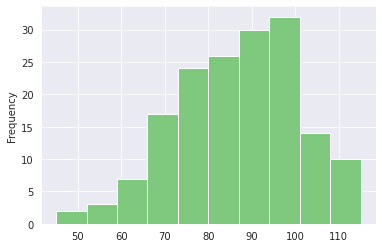

In [ ]:
pontuacao_quali = questionario_quali.sum(axis= 1)
pontuacao_quali.plot(kind= "hist", bins =10)

In [ ]:
dataset = dados[['Idade', "Escolaridade", "Sexo", "Extroversão",	"Neuroticismo",	"Conscienciosidade",	"Amabilidade"]]
dataset["Qualidade_de_vida"] = pontuacao_quali
dataset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Idade,Escolaridade,Sexo,Extroversão,Neuroticismo,Conscienciosidade,Amabilidade,Qualidade_de_vida
0,26,2,2,63,29,21,43,86
1,22,2,1,55,26,27,31,105
2,30,2,1,49,44,23,32,59
3,24,2,1,63,37,31,41,78
4,22,2,2,50,42,27,33,85
...,...,...,...,...,...,...,...,...
160,32,2,2,50,26,29,41,103
161,32,1,2,40,19,22,40,94
162,19,2,2,73,36,28,41,115
163,17,2,2,59,35,34,34,95


In [ ]:
from sklearn.preprocessing import Normalizer, StandardScaler

In [ ]:
padronizador = StandardScaler()
colunas = ["Extroversão",	"Neuroticismo",	"Conscienciosidade",	"Amabilidade", "Qualidade_de_vida"]
dataset_padronizado = pd.DataFrame(padronizador.fit_transform(dataset[["Extroversão",	"Neuroticismo",	"Conscienciosidade",	"Amabilidade", "Qualidade_de_vida"]]),columns= colunas)
dataset_padronizado

,Extroversão,Neuroticismo,Conscienciosidade,Amabilidade,Qualidade_de_vida
0,0.768304,-0.990927,-0.850846,1.622438,-0.008603
1,0.128455,-1.307180,0.107445,-1.019361,1.339944
2,-0.351432,0.590340,-0.531416,-0.799211,-1.924960
3,0.768304,-0.147585,0.746305,1.182139,-0.576413
4,-0.271451,0.379504,0.107445,-0.579061,-0.079579
...,...,...,...,...,...
160,-0.271451,-1.307180,0.426875,1.182139,1.197992
161,-1.071263,-2.045105,-0.691131,0.961989,0.559206
162,1.568116,-0.253003,0.267160,1.182139,2.049706
163,0.448379,-0.358420,1.225450,-0.358911,0.630182


In [ ]:
dataset_semi_padrozinado= dataset[["Idade", "Escolaridade", "Sexo"]]
dataset_semi_padrozinado["Extroversão"] = dataset_padronizado.Extroversão
dataset_semi_padrozinado["Neuroticismo"] = dataset_padronizado.Neuroticismo
dataset_semi_padrozinado["Conscienciosidade"] = dataset_padronizado.Conscienciosidade
dataset_semi_padrozinado["Amabilidade"] = dataset_padronizado.Amabilidade
dataset_semi_padrozinado["Qualidade_de_vida"]= dataset_padronizado.Qualidade_de_vida
dataset_semi_padrozinado


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Idade,Escolaridade,Sexo,Extroversão,Neuroticismo,Conscienciosidade,Amabilidade,Qualidade_de_vida
0,26,2,2,0.768304,-0.990927,-0.850846,1.622438,-0.008603
1,22,2,1,0.128455,-1.307180,0.107445,-1.019361,1.339944
2,30,2,1,-0.351432,0.590340,-0.531416,-0.799211,-1.924960
3,24,2,1,0.768304,-0.147585,0.746305,1.182139,-0.576413
4,22,2,2,-0.271451,0.379504,0.107445,-0.579061,-0.079579
...,...,...,...,...,...,...,...,...
160,32,2,2,-0.271451,-1.307180,0.426875,1.182139,1.197992
161,32,1,2,-1.071263,-2.045105,-0.691131,0.961989,0.559206
162,19,2,2,1.568116,-0.253003,0.267160,1.182139,2.049706
163,17,2,2,0.448379,-0.358420,1.225450,-0.358911,0.630182


In [ ]:
# verificando correlações
dataset.corr()

,Idade,Escolaridade,Sexo,Extroversão,Neuroticismo,Conscienciosidade,Amabilidade,Qualidade_de_vida
Idade,1.000000,0.296494,0.074859,0.021459,-0.233297,0.129801,0.200252,0.169346
Escolaridade,0.296494,1.000000,-0.074178,0.182678,-0.215292,0.012442,-0.019994,0.140780
Sexo,0.074859,-0.074178,1.000000,-0.194453,0.179060,-0.122994,0.153155,-0.033042
Extroversão,0.021459,0.182678,-0.194453,1.000000,-0.373129,0.340315,0.138518,0.411449
Neuroticismo,-0.233297,-0.215292,0.179060,-0.373129,1.000000,-0.220777,0.028749,-0.579436
Conscienciosidade,0.129801,0.012442,-0.122994,0.340315,-0.220777,1.000000,0.135949,0.395279
Amabilidade,0.200252,-0.019994,0.153155,0.138518,0.028749,0.135949,1.000000,0.013674
Qualidade_de_vida,0.169346,0.140780,-0.033042,0.411449,-0.579436,0.395279,0.013674,1.000000


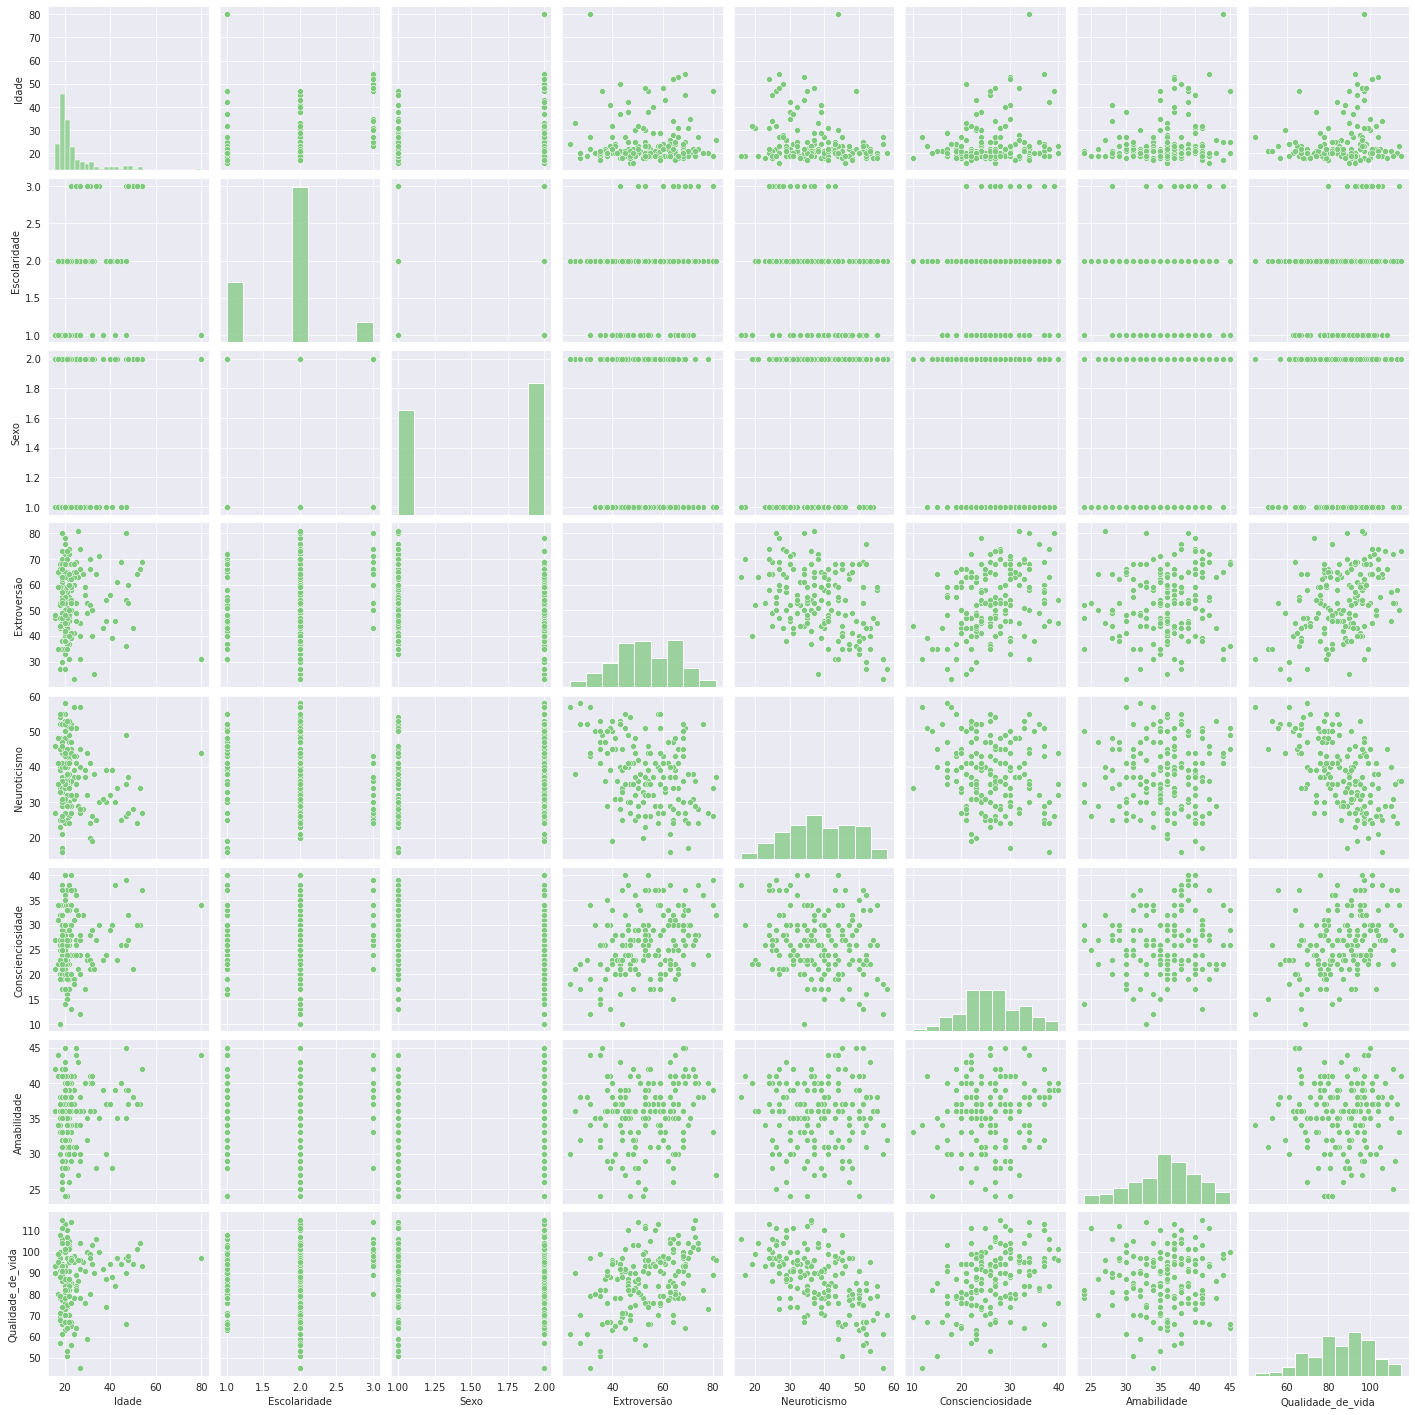

In [ ]:
ax= sns.pairplot(dataset)

Text(0.5, 1.05, 'Dispersão entre as variáveis')

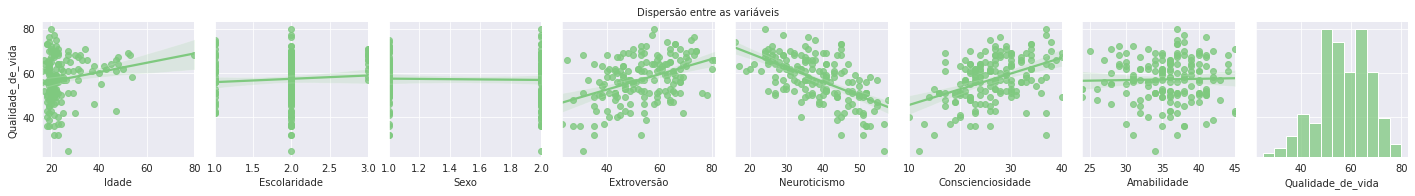

In [ ]:
ax = sns.pairplot(dataset,
                  y_vars="Qualidade_de_vida",
                  kind = "reg"
                  )
ax.fig.suptitle("Dispersão entre as variáveis", fontsize = 10, y =1.05)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.05, 'Dispersão Da qualidade de vida')

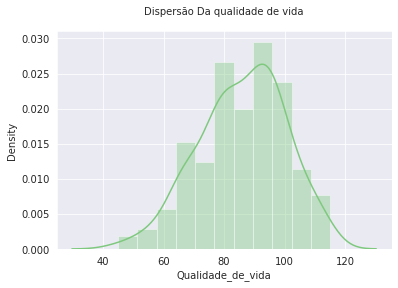

In [ ]:
ax = sns.distplot(dataset.Qualidade_de_vida)
ax.set_title("Dispersão Da qualidade de vida", fontsize = 10, y =1.05)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.05, 'Dispersão Da neuroticismo')

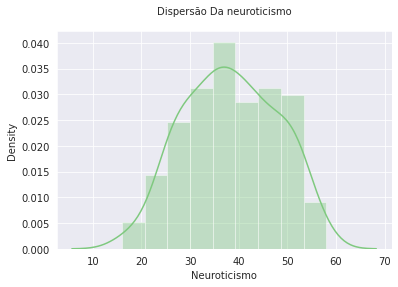

In [ ]:
ax = sns.distplot(dataset.Neuroticismo)
ax.set_title("Dispersão Da neuroticismo", fontsize = 10, y =1.05)

In [ ]:
dataset["log_idade"] = np.log(dataset["Idade"])
dataset["log_sexo"] = np.log(dataset["Sexo"])
dataset["log_escolaridade"] = np.log(dataset["Escolaridade"])
dataset["log_extroversão"] = np.log(dataset["Extroversão"])
dataset["log_neuroticismo"] = np.log(dataset["Neuroticismo"])
dataset["log_conscienciosidade"] = np.log(dataset["Conscienciosidade"])
dataset["log_amabilidade"] = np.log(dataset["Amabilidade"])
dataset["log_qualidade_de_vida"] = np.log(dataset["Qualidade_de_vida"])
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Idade,Escolaridade,Sexo,Extroversão,Neuroticismo,Conscienciosidade,Amabilidade,Qualidade_de_vida,log_idade,log_sexo,log_escolaridade,log_extroversão,log_neuroticismo,log_conscienciosidade,log_amabilidade,log_qualidade_de_vida
0,26,2,2,63,29,21,43,86,3.258097,0.693147,0.693147,4.143135,3.367296,3.044522,3.761200,4.454347
1,22,2,1,55,26,27,31,105,3.091042,0.000000,0.693147,4.007333,3.258097,3.295837,3.433987,4.653960
2,30,2,1,49,44,23,32,59,3.401197,0.000000,0.693147,3.891820,3.784190,3.135494,3.465736,4.077537
3,24,2,1,63,37,31,41,78,3.178054,0.000000,0.693147,4.143135,3.610918,3.433987,3.713572,4.356709
4,22,2,2,50,42,27,33,85,3.091042,0.693147,0.693147,3.912023,3.737670,3.295837,3.496508,4.442651


In [ ]:
dataset.columns

Index(['Idade', 'Escolaridade', 'Sexo', 'Extroversão', 'Neuroticismo',
       'Conscienciosidade', 'Amabilidade', 'Qualidade_de_vida', 'log_idade',
       'log_sexo', 'log_escolaridade', 'log_extroversão', 'log_neuroticismo',
       'log_conscienciosidade', 'log_amabilidade', 'log_qualidade_de_vida'],
      dtype='object')

# Separando variáveis para modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
# separando variável dependente
y = dataset.log_qualidade_de_vida


In [ ]:
# separando variáveis explicativas
X = dataset[["log_idade", "log_sexo", "log_escolaridade", 'log_extroversão', 'log_neuroticismo',
       'log_conscienciosidade']]

In [ ]:
#X = dataset[["Idade","Escolaridade", "Sexo","Extroversão","Neuroticismo","Conscienciosidade","Amabilidade"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size= 0.25,)

X_train contém dados que serão usados para treinar o modelo. X_test contém dados que serão usados para verificar se as previsões fazem sentido

# StatsModels

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst= True).fit()

In [ ]:
print(modelo_statsmodels.summary())

                              OLS Regression Results                             
Dep. Variable:     log_qualidade_de_vida   R-squared:                       0.443
Model:                               OLS   Adj. R-squared:                  0.415
Method:                    Least Squares   F-statistic:                     15.40
Date:                   Wed, 14 Apr 2021   Prob (F-statistic):           6.34e-13
Time:                           01:38:20   Log-Likelihood:                 75.485
No. Observations:                    123   AIC:                            -137.0
Df Residuals:                        116   BIC:                            -117.3
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


# Treinando o Modelo

In [ ]:
y = dataset.Qualidade_de_vida
X = dataset[["log_sexo", 'log_extroversão', 'log_neuroticismo',
       'log_conscienciosidade']]

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size= 0.25,)       

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
# instanciando objeto
modelo = LinearRegression()

In [ ]:
# alimentando dados de treino
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("R² = {}".format(modelo.score(X_train,y_train).round(2)))

R² = 0.5


In [ ]:
y_previsto = modelo.predict(X_test)

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.15


In [ ]:
entrada = X_test[0:1]
entrada

,log_sexo,log_extroversão,log_neuroticismo,log_conscienciosidade
115,0.0,4.330733,3.951244,3.583519


In [ ]:
modelo.predict(entrada)[0]

102.74055860663796

# Testando o modelo

In [ ]:
# dado real
dataset_padronizado[0:1]

,Extroversão,Neuroticismo,Conscienciosidade,Amabilidade,Qualidade_de_vida
0,0.768304,-0.990927,-0.850846,1.622438,-0.012543


In [ ]:
# simulando
idade = 26
escolaridade = 2
sexo = 2
extroversão = 0.76
neuroticismo = -0.99
conscienciosidade = -0.85
amabilidade = 1.62
entrada = [[extroversão, neuroticismo, conscienciosidade]]
modelo.predict(entrada)[0]

0.32740787261075266

In [ ]:
# dado real
dataset[1:2]

,Idade,Escolaridade,Sexo,Extroversão,Neuroticismo,Conscienciosidade,Amabilidade,Qualidade_de_vida
1,22,2,1,55,26,27,31,72


In [ ]:
idade = 22
escolaridade = 2
sexo = 1
extroversão = 0.128455
neuroticismo = 1.307180
conscienciosidade = 0.107445
amabilidade = -1.019361
entrada = [[extroversão, neuroticismo, conscienciosidade]]
modelo.predict(entrada)[0]

51.33934922727769

In [ ]:
# dado real
dataset[2:3]

,Idade,Escolaridade,Sexo,Extroversão,Neuroticismo,Conscienciosidade,Amabilidade,Qualidade_de_vida
2,30,2,1,49,44,23,32,42


In [ ]:
idade = 30
escolaridade = 2 
sexo = 1
extroversão = -0.351432
neuroticismo = 0.590340
conscienciosidade = -0.531416
amabilidade = -0.799211	
entrada = [[extroversão, neuroticismo, conscienciosidade]]
modelo.predict(entrada)[0]

51.9151169367968

In [ ]:
dataset_semi_padrozinado[3:4]

,Idade,Escolaridade,Sexo,Extroversão,Neuroticismo,Conscienciosidade,Amabilidade,Qualidade_de_vida
3,24,2,1,0.768304,-0.147585,0.746305,1.182139,-0.702409


# Coeficientes de Regressão

In [ ]:
X.columns

Index(['Extroversão', 'Neuroticismo', 'Conscienciosidade'], dtype='object')

In [ ]:
index = ["Intercepto", "Extroversão",	"Neuroticismo",	"Conscienciosidade"]

In [ ]:
pd.DataFrame(data= np.append(modelo.intercept_, modelo.coef_),
             index= index,
             columns= ["Parâmentros"]
             )

,Parâmentros
Intercepto,-0.001036
Extroversão,0.168467
Neuroticismo,-0.478567
Conscienciosidade,0.321616


# Verificando Dispersão

In [ ]:
y_previsto_train = modelo.predict(X_train)

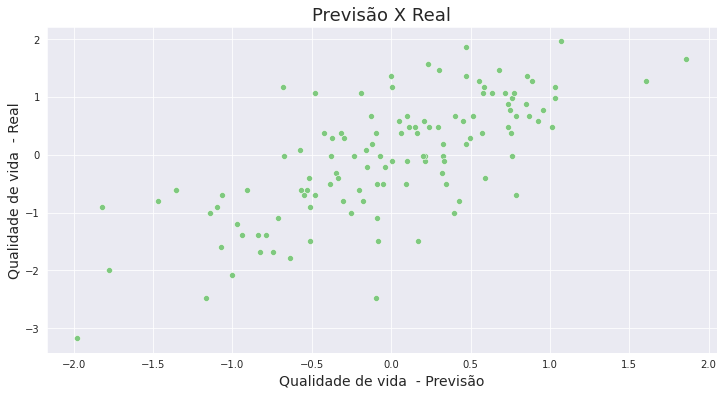

In [ ]:
ax= sns.scatterplot(x= y_previsto_train, y= y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title("Previsão X Real", fontsize = 18)
ax.set_xlabel("Qualidade de vida  - Previsão", fontsize= 14)
ax.set_ylabel("Qualidade de vida  - Real", fontsize= 14)
ax

In [ ]:
residuo = y_train - y_previsto_train
residuo.describe()

count    1.230000e+02
mean    -1.083144e-17
std      7.230253e-01
min     -2.382567e+00
25%     -3.941551e-01
50%     -3.742969e-02
75%      4.560402e-01
max      1.854081e+00
Name: Qualidade_de_vida, dtype: float64

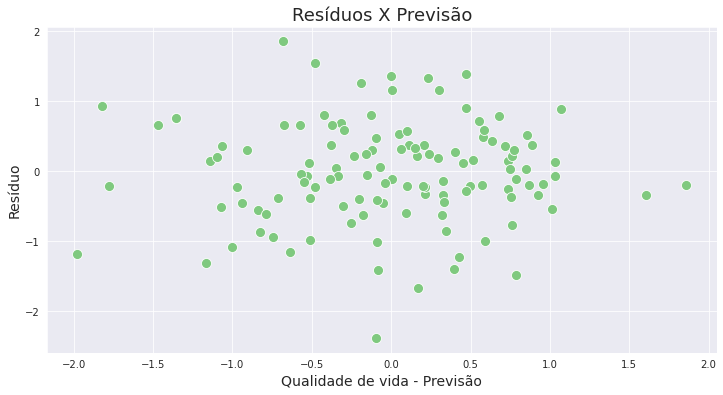

In [ ]:
ax= sns.scatterplot(x= y_previsto_train, y= residuo, s=100)
ax.figure.set_size_inches(12, 6)
ax.set_title("Resíduos X Previsão", fontsize = 18)
ax.set_xlabel("Qualidade de vida - Previsão", fontsize= 14)
ax.set_ylabel("Resíduo", fontsize= 14)
ax

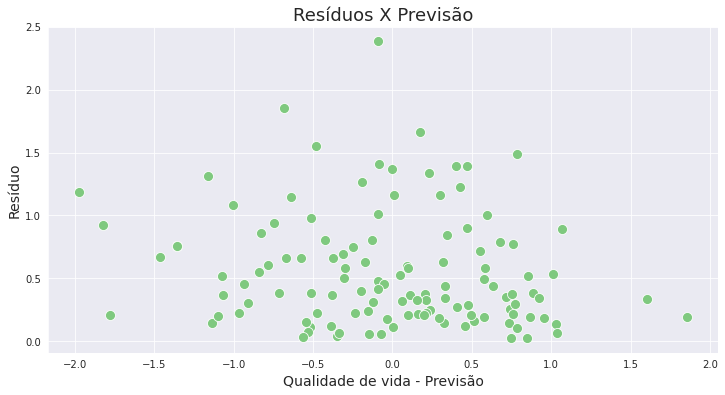

In [ ]:
ax= sns.scatterplot(x= y_previsto_train, y= np.sqrt(residuo**2), s=100)
ax.figure.set_size_inches(12, 6)
ax.set_title("Resíduos X Previsão", fontsize = 18)
ax.set_xlabel("Qualidade de vida - Previsão", fontsize= 14)
ax.set_ylabel("Resíduo", fontsize= 14)
ax

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequência')

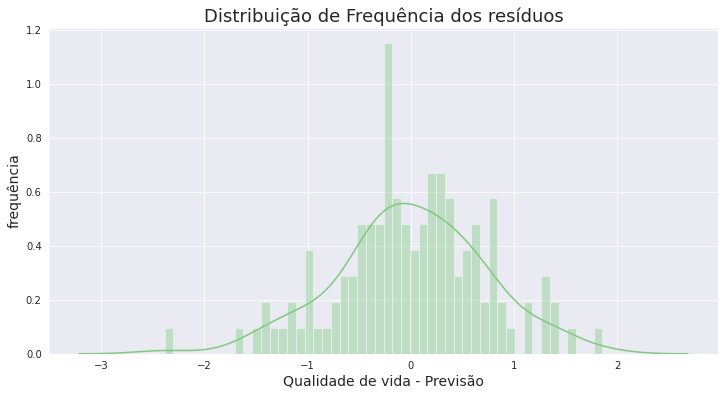

In [ ]:
ax = sns.distplot(residuo, bins=50)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de Frequência dos resíduos", fontsize = 18)
ax.set_xlabel("Qualidade de vida - Previsão", fontsize= 14)
ax.set_ylabel("frequência", fontsize= 14)
# o ideal é seguir uma curva normal

In [ ]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM =  np.sqrt(metrics.mean_squared_error(y_test, y_previsto)).round(2)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ["EQM", "REQM", "R²"], columns= ["Métricas"])

,Métricas
EQM,0.58
REQM,0.76
R²,0.37


# Salvando Modelo

In [ ]:
import pickle

In [ ]:
output = open("modelo_estimação_qualidade_de_vida", "wb")
pickle.dump(modelo, output)
output.close()

In [ ]:
import pickle
 
modelo = open("modelo_estimação_qualidade_de_vida",'rb')
lm_new = pickle.load(modelo)
modelo.close()

"""sexo
1 = Masculino
2 = Feminino

Escolareidade (atual ou em andamento)
1 = fundamental
2 = médio 
3 = superior 
4 = pos"""

idade = 30
escolaridade = 2 
sexo = 1
extroversão = -0.351432
neuroticismo = 0.590340
conscienciosidade = -0.531416
amabilidade = -0.799211	

entrada = [[idade, escolaridade, sexo, extroversão, neuroticismo, conscienciosidade, amabilidade]]

print("Estimativa da Qualidade de vida")
print('EscoreZ = {0:.2f}'.format(lm_new.predict(entrada)[0]))

Estimativa da Qualidade de vida
EscoreZ = 51.61
